In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from xgboost import plot_importance
import numpy as np

In [16]:
# Carregar os dados

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

path = "G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\ENERGIA_v3.xlsx"
df = pd.read_excel(path, sheet_name = "ENERGIA_1.1_others")

In [17]:
df

,ID_Rota,ENERGIA EST. REG. EXP. (%),dist (km),Umidade do ar (%),T_avg (C),dist_clientes (km),Tempo_rota (h),m_ponderada (T),desvpad_altitudes (m),Vento_avg (m/s),V_avg (m/s),num_entregas,Chuva (mm),T_max (C),TBGREEN (%),Unnamed: 15,PRED_FÍSICOESTAT,PRED_ESTAT,PRED_HIBRIDO,Unnamed: 19,mape_físico,mape_fisicoestat,mape_estat,mape_hibrido
0,20230901_RHQ2H04,41.716498,40.4,52.796897,22.144429,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.000000,27.5,41.2,NaN,39.023916,39.487821,40.562448,NaN,0.012536,0.052818,0.041558,0.015475
1,20230902_RHS6B08,47.357887,49.6,67.361194,22.191493,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.000000,29.6,41.6,NaN,42.566862,42.144709,43.143703,NaN,0.138411,0.023242,0.013094,0.037108
2,20230902_RHS6F90,54.828160,50.1,62.676540,23.431280,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.000000,29.6,46.4,NaN,47.258398,47.917913,47.050943,NaN,0.181641,0.018500,0.032714,0.014029
3,20230902_RHT4G96,45.270473,54.3,76.893316,19.594087,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.000000,24.0,38.0,NaN,41.255909,44.534862,42.069706,NaN,0.191328,0.085682,0.171970,0.107098
4,20230904_RHQ2H05,70.687503,57.8,51.407254,27.653575,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.000000,30.9,52.4,NaN,57.218498,56.474622,56.997880,NaN,0.348998,0.091956,0.077760,0.087746
5,20230904_RHS6B07,49.804507,49.5,58.448097,25.552768,2.411257,1.926111,8.506759,21.729469,2.599654,7.149071,2,0.000000,30.0,37.6,NaN,44.103407,45.932698,45.317378,NaN,0.324588,0.172963,0.221614,0.205249
6,20230905_RHQ2H05,68.552350,71.1,69.038679,21.929434,36.466165,3.971944,8.305837,13.244290,2.329340,4.977017,8,0.000000,25.6,54.8,NaN,55.877563,59.305684,56.776140,NaN,0.250955,0.019664,0.082221,0.036061
7,20230905_RHT4G68,41.808351,43.6,71.496350,22.489416,2.655315,4.330000,8.176299,13.845060,2.444282,2.801628,2,0.000000,25.6,34.0,NaN,39.081603,39.866764,38.900857,NaN,0.229657,0.149459,0.172552,0.144143
8,20230906_RHQ2H04,55.723192,47.1,76.202114,17.503303,12.931974,3.005278,9.514315,14.945175,2.826552,4.357748,15,0.000000,19.6,47.6,NaN,47.820502,44.151402,45.017402,NaN,0.170655,0.004632,0.072450,0.054256
9,20230906_RHQ2H05,65.978881,66.4,74.740506,17.815928,23.984334,3.981667,8.056873,20.623721,2.958755,4.638538,12,0.000000,19.6,57.2,NaN,54.261355,56.366287,53.892157,NaN,0.153477,0.051375,0.014575,0.057829


In [18]:
# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df[['ENERGIA EST. REG. EXP. (%)', 'dist (km)', 'T_avg (C)', 'dist_clientes (km)' , 'Tempo_rota (h)', 'm_ponderada (T)', 'desvpad_altitudes (m)', 'num_entregas', 'Chuva (mm)']]
y = df['TBGREEN (%)']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Inicializar o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Treinar o modelo
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
# Fazer previsões
y_pred = xgb_model.predict(X_test)
y_pred

array([51.910736, 39.902767, 34.24352 , 52.700478, 56.38942 , 49.465313,
       37.27256 , 42.05498 , 32.94737 , 46.480118, 61.260376, 50.860832,
       42.507404, 51.962437, 40.627705, 56.202503, 45.99388 , 51.333645,
       54.386524, 46.861847, 52.25387 , 38.025784, 44.864075, 49.5045  ,
       48.3095  , 37.01067 , 44.925854, 45.00042 , 50.06835 , 45.1522  ,
       57.744064, 41.405716, 49.8282  , 57.77851 , 40.380486, 52.062885],
      dtype=float32)

In [23]:
# Calcular o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 5.048354539384586


In [24]:
# Definir o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir o espaço de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.85, 0.9, 0.95, 1.0]
}

# Configurar a busca em grade
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, verbose=1, n_jobs=-1)

# Ajustar a busca em grade
grid_search.fit(X_train, y_train)

# Melhor configuração de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor desempenho:", -grid_search.best_score_)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Melhores parâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.7}
Melhor desempenho: 0.0891731302063304


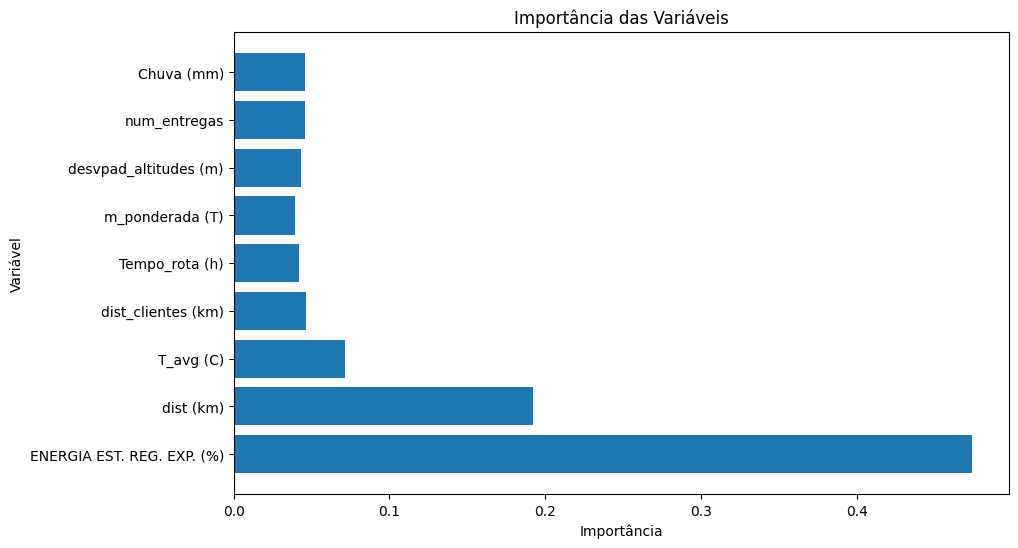

In [25]:
# Obter o modelo com melhor desempenho
best_model = grid_search.best_estimator_

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis')
plt.show()


In [26]:
best_model.feature_importances_

array([0.47395512, 0.19191168, 0.0717735 , 0.0462425 , 0.04180627,
       0.03939857, 0.04319199, 0.04562157, 0.04609883], dtype=float32)

In [27]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = best_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")

MAPE: 0.0784


In [28]:
len(y_pred)

36